In [3]:
!pip install pyLDAvis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 21.5 MB/s eta 0:00:00


In [4]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.datasets import fetch_20newsgroups
import gensim
from gensim import corpora
from gensim.models import LdaModel
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from gensim.models import Word2Vec
import numpy as np


In [5]:
# Download NLTK resources if not already downloaded
nltk.download('punkt')
nltk.download('stopwords')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [6]:
# Load the 20 Newsgroups dataset
newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
documents = newsgroups.data

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [7]:
# Text Preprocessing
def preprocess_text(text):
    tokens = word_tokenize(text.lower())  # Tokenize and convert to lowercase
    tokens = [token for token in tokens if token.isalpha()]  # Remove punctuation
    tokens = [token for token in tokens if token not in stopwords.words('english')]  # Remove stopwords
    return tokens

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [8]:
# Apply preprocessing to the documents
preprocessed_documents = [preprocess_text(doc) for doc in documents]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [9]:
# Create a dictionary and a corpus
dictionary = corpora.Dictionary(preprocessed_documents)
corpus = [dictionary.doc2bow(doc) for doc in preprocessed_documents]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [10]:
# Train the LDA model
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=10, random_state=42)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [11]:
# Print the topics found by the LDA model
print("LDA Topics:")
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic: {idx} \nWords: {topic}")

LDA Topics:
Topic: 0 
Words: 0.011*"space" + 0.004*"center" + 0.004*"new" + 0.004*"earth" + 0.004*"nasa" + 0.004*"also" + 0.004*"launch" + 0.004*"april" + 0.003*"may" + 0.003*"university"
Topic: 1 
Words: 0.016*"team" + 0.012*"game" + 0.011*"games" + 0.009*"play" + 0.009*"year" + 0.008*"season" + 0.007*"league" + 0.007*"gm" + 0.007*"nhl" + 0.006*"win"
Topic: 2 
Words: 0.008*"get" + 0.007*"would" + 0.007*"one" + 0.007*"use" + 0.006*"like" + 0.006*"know" + 0.005*"anyone" + 0.005*"thanks" + 0.005*"also" + 0.005*"windows"
Topic: 3 
Words: 0.038*"p" + 0.038*"x" + 0.034*"r" + 0.034*"q" + 0.033*"g" + 0.031*"max" + 0.030*"n" + 0.026*"c" + 0.025*"w" + 0.025*"b"
Topic: 4 
Words: 0.018*"card" + 0.007*"system" + 0.007*"bus" + 0.007*"dos" + 0.006*"scsi" + 0.006*"cards" + 0.006*"controller" + 0.006*"drivers" + 0.005*"windows" + 0.005*"ide"
Topic: 5 
Words: 0.009*"would" + 0.007*"one" + 0.006*"people" + 0.005*"use" + 0.004*"may" + 0.004*"government" + 0.003*"could" + 0.003*"also" + 0.003*"like" + 0.0

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [12]:
# Prepare the visualization
lda_display = gensimvis.prepare(lda_model, corpus, dictionary)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [14]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook() # For use in Jupyter Notebook

# ... (Your existing code for creating lda_model and lda_display) ...

# Display the visualization in a web browser
pyLDAvis.display(lda_display)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [16]:
# Train Word2Vec model on the preprocessed documents
word2vec_model = Word2Vec(sentences=preprocessed_documents, vector_size=100, window=5, min_count=5, workers=4)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [17]:
# Represent each document as the average of word vectors
def document_vector(doc):
    # Remove out-of-vocabulary words
    doc = [word for word in doc if word in word2vec_model.wv.index_to_key]
    return np.mean(word2vec_model.wv[doc], axis=0)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [20]:
# Represent each document as the average of word vectors
def document_vector(doc):
    # Remove out-of-vocabulary words
    doc = [word for word in doc if word in word2vec_model.wv.index_to_key]
    if doc:  # Check if any words remain after filtering
        return np.mean(word2vec_model.wv[doc], axis=0)
    else:
        return np.zeros(word2vec_model.vector_size)  # Return a zero vector for empty documents

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [24]:
# Calculate document vectors for all documents
document_vectors = [document_vector(doc) for doc in preprocessed_documents]

# Calculate cosine similarity between document vectors
cosine_similarities = cosine_similarity(document_vectors)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [25]:
# Cluster documents using KMeans
num_clusters = 10
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(document_vectors)
labels = kmeans.labels_


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: 
The markers list has fewer values (5) than needed (10) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: 
The markers list has fewer values (5) than needed (10) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)


<Figure size 1000x800 with 0 Axes>

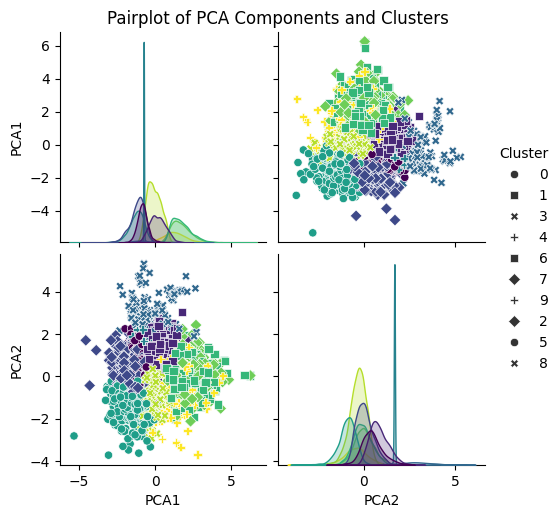

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'document_vectors' is already calculated
# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(document_vectors)

# Create a DataFrame for easier plotting
df = pd.DataFrame({'PCA1': reduced_vectors[:, 0], 'PCA2': reduced_vectors[:, 1], 'Cluster': labels})

# Create a pairplot
plt.figure(figsize=(10, 8))
sns.pairplot(df, hue='Cluster', palette='viridis', markers=["o", "s", "D", "X", "P"])
plt.suptitle('Pairplot of PCA Components and Clusters', y=1.02)
plt.show()


In [31]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Comparison of document similarity using LDA-based vectors
lda_doc_vectors = [lda_model.get_document_topics(bow, minimum_probability=0.0) for bow in corpus]

# Convert list of tuples to a NumPy array
lda_doc_vectors_array = np.array([[prob for _, prob in doc] for doc in lda_doc_vectors])

# Calculate cosine similarity between document vectors
lda_cosine_similarities = cosine_similarity(lda_doc_vectors_array)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [32]:
# Output LDA and word embedding similarities
print("Cosine Similarity using Word Embeddings:")
print(cosine_similarities)

print("\nCosine Similarity using LDA-based Vectors:")
print(lda_cosine_similarities)

Cosine Similarity using Word Embeddings:
[[1.         0.42392779 0.70395171 ... 0.64006309 0.73521627 0.78072992]
 [0.42392779 1.         0.222363   ... 0.83856556 0.40688163 0.72871509]
 [0.70395171 0.222363   1.         ... 0.39359112 0.61198926 0.68102735]
 ...
 [0.64006309 0.83856556 0.39359112 ... 1.         0.60762783 0.84155725]
 [0.73521627 0.40688163 0.61198926 ... 0.60762783 1.         0.85378473]
 [0.78072992 0.72871509 0.68102735 ... 0.84155725 0.85378473 1.        ]]

Cosine Similarity using LDA-based Vectors:
[[1.0000001  0.13549167 0.1568023  ... 0.00458035 0.6905712  0.32175258]
 [0.13549167 1.0000001  0.02892562 ... 0.07350464 0.10849323 0.1041107 ]
 [0.1568023  0.02892562 0.9999999  ... 0.00450711 0.28367308 0.16102795]
 ...
 [0.00458035 0.07350464 0.00450711 ... 1.0000001  0.01057361 0.8621452 ]
 [0.6905712  0.10849323 0.28367308 ... 0.01057361 0.99999994 0.47189143]
 [0.32175258 0.1041107  0.16102795 ... 0.8621452  0.47189143 0.99999994]]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
